# Import Libraries and Data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# define path
path = r'/Users/mimielaurant/Documents/Career Foundry/Immersion_Achievement 4/Instacart Basket Analysis'

In [3]:
# import orders_products_all2.pkl
ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all2.pkl'))

In [4]:
# inspect dataframe
ords_prods_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 29 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   order_id               int64  
 1   user_id                int64  
 2   order_number           int64  
 3   orders_day_of_week     int64  
 4   order_hour_of_day      int64  
 5   days_since_last_order  float64
 6   product_id             int64  
 7   add_to_cart_order      int64  
 8   reordered              int64  
 9   product_name           object 
 10  aisle_id               int64  
 11  department_id          int64  
 12  prices                 float64
 13  price_range_loc        object 
 14  busiest_days           object 
 15  busiest_period_of_day  object 
 16  max_order              int64  
 17  loyalty_flag           object 
 18  spending_flag          object 
 19  frequency_flag         object 
 20  first_name             object 
 21  surname                object 
 22  gender          

# Address PII Data.

In [5]:
# drop the 'first_name' and 'surname' columns
ords_prods_all = ords_prods_all.drop(columns = ['first_name', 'surname'])

In [6]:
#check result
ords_prods_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,loyalty_flag,spending_flag,frequency_flag,gender,state,age,date_joined,number_od_dependants,marital_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,New customer,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,New customer,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,New customer,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,New customer,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,New customer,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


# Create a regional segmentation of the data.

In [7]:
# create regional segmentation loop
region = []
for value in ords_prods_all['state']:
    if value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', ' New York', 'Pennsylvania', 'New Jersey']:
        region.append('Northeast')
    elif value in ['Wisconsin', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']:
        region.append('Midwest')
    elif value in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tenneessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
        region.append('South')
    else: region.append ('West')

In [8]:
# combine loop with dataframe to create a new column
ords_prods_all['region'] = region

In [ ]:
# check result
ords_prods_all.head()

# Determine whether there’s a difference in spending habits between the different U.S. regions.

In [10]:
# crosstab the 'spending_flag' with 'region' column
spending_habit = pd.crosstab(ords_prods_all['region'], ords_prods_all['spending_flag'], dropna = False)

In [11]:
spending_habit

spending_flag,High spender,Low spender
region,,
Midwest,141516,6824881
Northeast,98062,4988691
South,198628,9975384
West,196039,9981658


Text(0.5, 1.0, 'Regional Spending Habits')

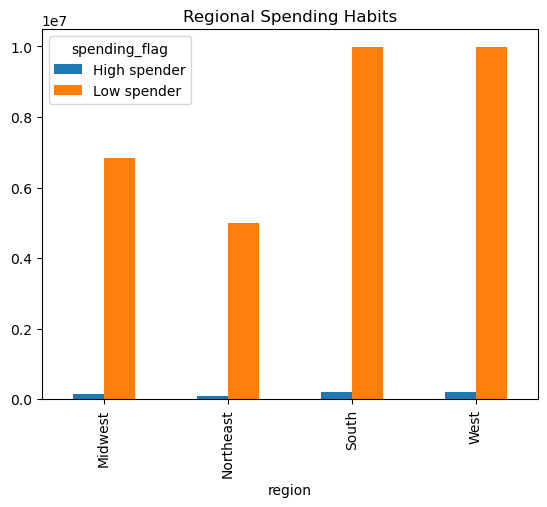

In [12]:
# create bar chart
spending_habit_bar = spending_habit.plot.bar()
plt.title('Regional Spending Habits')

The ratio of low- and high- spenders appears to be consistent across regions, with the South having thr most high spenders.

In [13]:
# export visualization
spending_habit_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'spending_habits.png'))

# Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data.

In [14]:
# create a new column for low-activity customers
ords_prods_all.loc[ords_prods_all['max_order'] <5, 'customer_activity'] = 'Low-Activity Customer'

In [15]:
ords_prods_all.loc[ords_prods_all['max_order'] >=5, 'customer_activity'] = 'High-Activity Customer'

In [16]:
# check result
ords_prods_all['customer_activity'].value_counts(dropna = False)

High-Activity Customer    30964564
Low-Activity Customer      1440295
Name: customer_activity, dtype: int64

In [17]:
# creat subset of low-activity customers
low_activity = ords_prods_all[ords_prods_all['customer_activity']=='Low-Activity Customer']

In [18]:
low_activity.shape

(1440295, 29)

In [19]:
# export low_activity
low_activity.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'low_activity_cust.pkl'))

In [20]:
# exclude low-activity customers from dataset
ords_prods_all = ords_prods_all.loc[ords_prods_all ['customer_activity'] == 'High-Activity Customer']

In [21]:
#export dataset
ords_prods_all.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_all3.pkl'))

# Customer profile based on age

In [24]:
# create a flag for young adults, ages 18-25
ords_prods_all.loc[ords_prods_all ['age'] <25, 'age_group'] = 'Young Adult'

In [26]:
# create flag for adults, ages 26-45
ords_prods_all.loc[(ords_prods_all ['age']>=26) & (ords_prods_all ['age']<=45), 'age_group'] = 'Adult'

In [27]:
# create flag for middle aged adults, ages 46-65
ords_prods_all.loc[(ords_prods_all ['age']>=46) & (ords_prods_all ['age']<=65), 'age_group'] = 'Middle Aged Adult'

In [28]:
# create flag for elder adults, age 65+
ords_prods_all.loc[ords_prods_all ['age'] >65, 'age_group'] = 'Elder Adult'

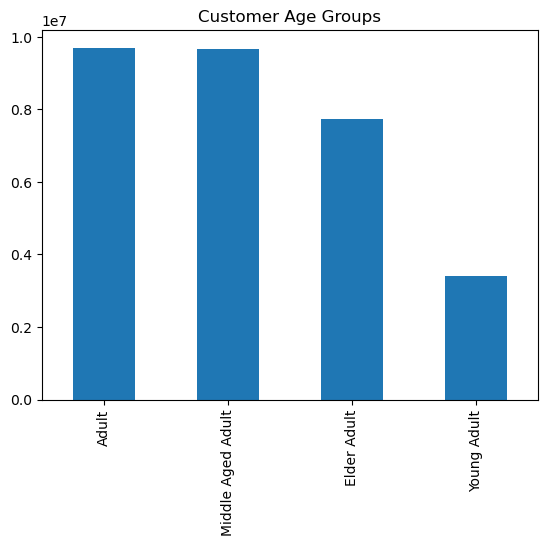

In [31]:
# create bar chart
age_groups_bar = ords_prods_all['age_group'].value_counts().plot.bar(title = 'Customer Age Groups')

In [32]:
# export visualization
age_groups_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_groups.png'))

In [39]:
# crosstab age groups by regions
age_region = pd.crosstab(ords_prods_all['region'], ords_prods_all['age_group'], dropna = False)

In [34]:
# check result
age_region

age_group,Adult,Elder Adult,Middle Aged Adult,Young Adult
region,,,,
Midwest,2102549,1644371,2085588,726101
Northeast,1499114,1243280,1512357,536430
South,3077194,2391862,3014439,1092832
West,3023682,2451321,3054289,1059831


Text(0.5, 1.0, 'Age Groups by Region')

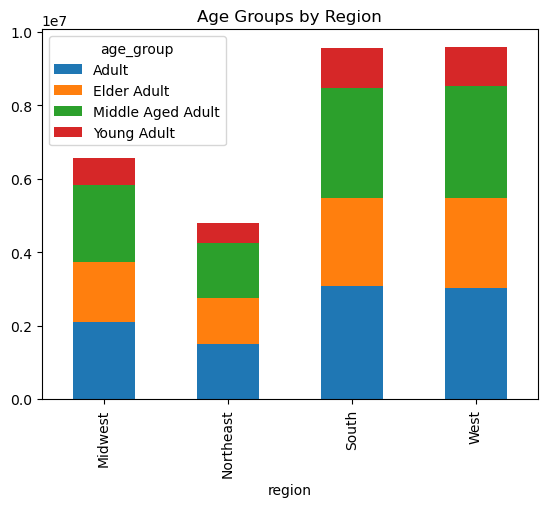

In [117]:
# create bar chart
age_region_bar = age_region.plot.bar(stacked = True)
plt.title('Age Groups by Region')

In [118]:
# export visualization
age_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_regions.png'))

In [42]:
# crosstab age groups by order frequency
age_orders = pd.crosstab (ords_prods_all['frequency_flag'], ords_prods_all['age_group'], dropna = False)

In [43]:
age_orders

age_group,Adult,Elder Adult,Middle Aged Adult,Young Adult
frequency_flag,,,,
Frequent Customer,6642552,5310708,6597287,2350647
Non-frequent customer,899332,717553,919651,316200
Regular customer,2160655,1702573,2149735,748347


Text(0.5, 1.0, 'Order Frequency by Age Group')

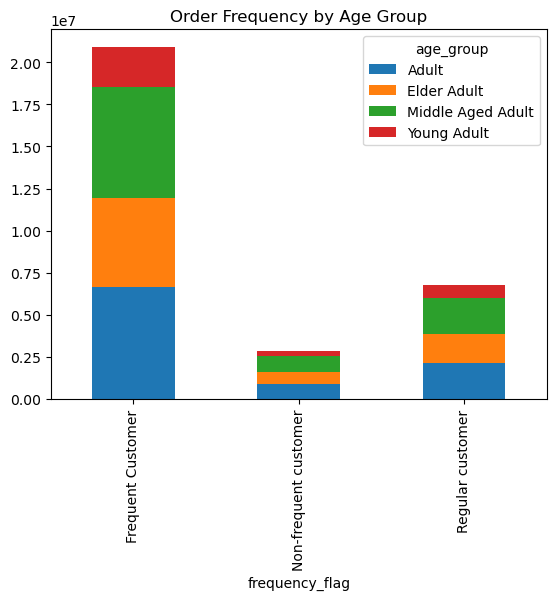

In [119]:
# create bar chart
age_ords_bar = age_orders.plot.bar(stacked = True)
plt.title('Order Frequency by Age Group')

In [120]:
# export visualization
age_ords_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_orders.png'))

In [47]:
# crosstab age groups by spending habits
age_spend = pd.crosstab(ords_prods_all['spending_flag'], ords_prods_all['age_group'], dropna = False)

In [48]:
age_spend

age_group,Adult,Elder Adult,Middle Aged Adult,Young Adult
spending_flag,,,,
High spender,187562,146251,195610,66466
Low spender,9514977,7584583,9471063,3348728


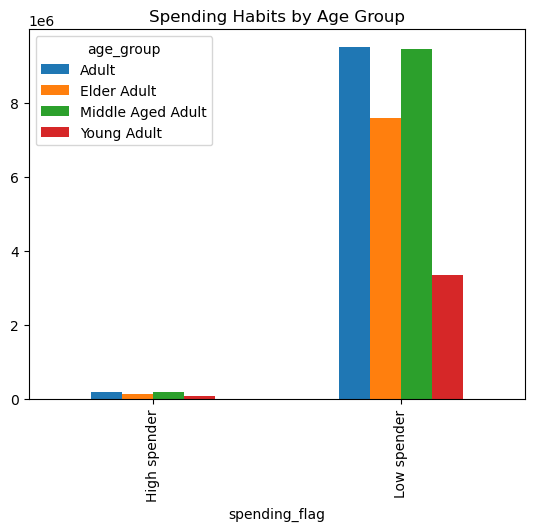

In [49]:
# create bar chart
age_spend_bar = age_spend.plot.bar(title = 'Spending Habits by Age Group')

In [50]:
# export visaulization
age_spend_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_spend.png'))

In [53]:
# import departments_wrangled.csv
df_dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [54]:
df_dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [55]:
# rename column
df_dept.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [56]:
df_dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [60]:
# merge df_dept with ords_prods_all
ords_prods_dept = ords_prods_all.merge(df_dept, on='department_id')

In [61]:
# crosstab department and age groups
age_dept = pd.crosstab(ords_prods_dept['department'], ords_prods_dept['age_group'], dropna = False)

In [62]:
age_dept

age_group,Adult,Elder Adult,Middle Aged Adult,Young Adult
department,,,,
alcohol,45481,34691,45267,17477
babies,130299,100162,128697,45825
bakery,352102,278458,350395,123582
beverages,797642,646414,809502,279256
breakfast,209410,165491,210472,75448
bulk,10421,8336,10388,3767
canned goods,317972,251940,315850,111594
dairy eggs,1630318,1291039,1608332,573152
deli,315618,250463,313198,109972


In [64]:
age_dept = age_dept.sort_values(by = ['Adult'], ascending = True)

Text(0.5, 1.0, 'Departmental Spending by Age Group')

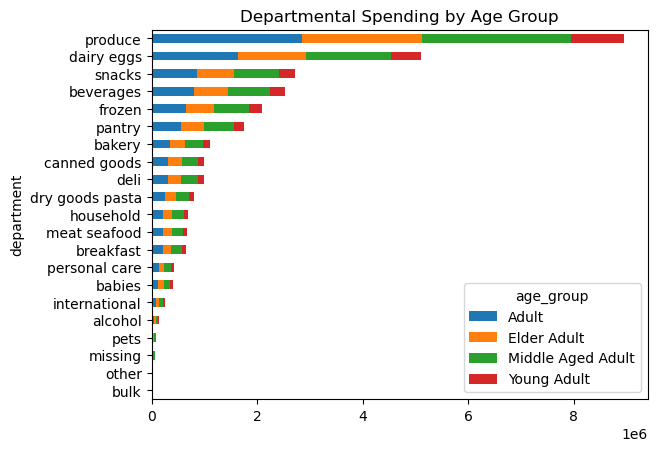

In [121]:
age_dept_bar = age_dept.plot.barh(stacked = True)
plt.title('Departmental Spending by Age Group')

In [122]:
# export visualization
age_dept_bar.figure.savefig(os.path.join(path, '04 Analysis', 'age_dept.png'))

In [69]:
# descriptive stats
ords_prods_all['age_group'].describe()

count     30515240
unique           4
top          Adult
freq       9702539
Name: age_group, dtype: object

# Customer profile based on income

In [70]:
#descriptive stats
ords_prods_all['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

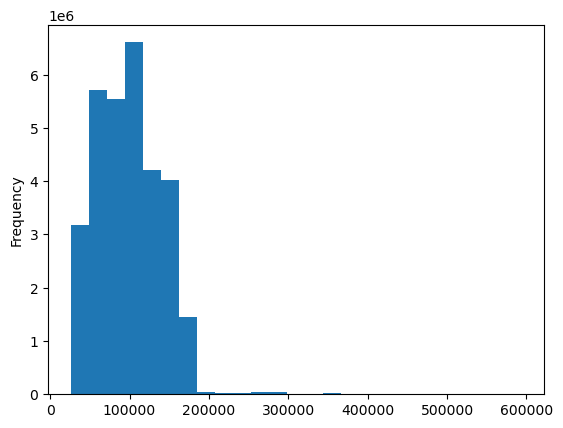

In [71]:
# create a histogram for income distribution
income_hist = ords_prods_all['income'].plot.hist(bins=25)

The income brackets I used come come this article - https://www.fool.com/the-ascent/personal-finance/articles/does-your-income-make-you-upper-class-middle-class-or-lower-class/

In [72]:
# create flag for low income, 0-28007
ords_prods_dept.loc[(ords_prods_dept['income']<= 28007), 'income_group'] = 'Low Income'

In [74]:
# create flag for lower middle income, 28008-55000
ords_prods_dept.loc[(ords_prods_dept['income']>=28008) & (ords_prods_dept['income']<=55000), 'income_group'] = 'Lower Middle Income'

In [75]:
# create flag for middle income, 55001-89744
ords_prods_dept.loc[(ords_prods_dept['income']>=55001) & (ords_prods_dept['income']<=89744), 'income_group'] = 'Middle Income'

In [76]:
# create flag for upper middle income, 89755-149131
ords_prods_dept.loc[(ords_prods_dept['income']>=89755) & (ords_prods_dept['income']<=149131), 'income_group'] = ' Upper Middle Income'

In [77]:
# create flag for upper income, above 149131
ords_prods_dept.loc[(ords_prods_dept['income']>149131), 'income_group'] = 'High Income'

In [78]:
ords_prods_dept['income_group'].value_counts(dropna = False)

 Upper Middle Income    13831182
Middle Income            8624409
Lower Middle Income      4390203
High Income              4055236
Low Income                 62185
NaN                         1349
Name: income_group, dtype: int64

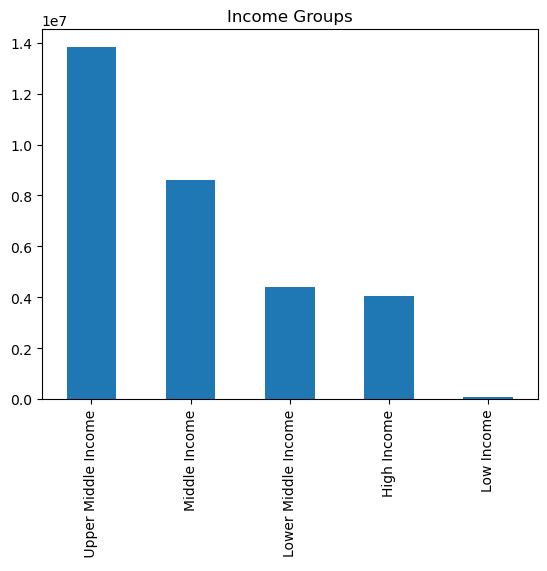

In [79]:
# create bar chart
income_group_bar = ords_prods_dept['income_group'].value_counts().plot.bar(title = 'Income Groups')

In [80]:
# export visualization
income_group_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_bar.png'))

In [81]:
# crosstab income with region
income_region = pd.crosstab(ords_prods_dept['region'], ords_prods_dept['income_group'], dropna = False)

In [82]:
income_region

income_group,Upper Middle Income,High Income,Low Income,Lower Middle Income,Middle Income
region,,,,,
Midwest,3004578,875047,14514,927530,1836198
Northeast,2190501,630145,9956,696638,1330783
South,4299972,1258967,18576,1410828,2732533
West,4336131,1291077,19139,1355207,2724895


Text(0.5, 1.0, 'Income Groups by Region')

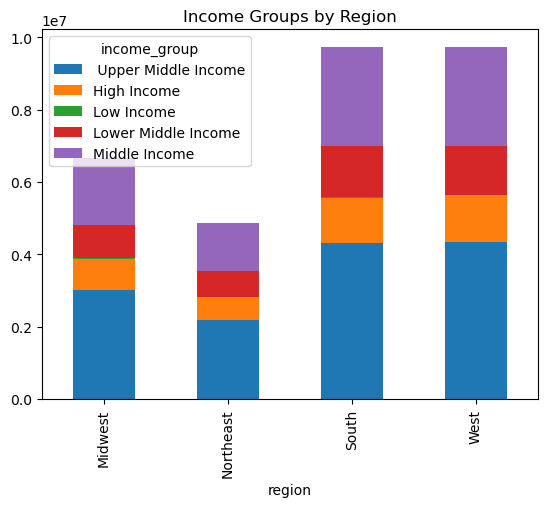

In [124]:
income_region_bar = income_region.plot.bar(stacked = True)
plt.title('Income Groups by Region')

In [125]:
# export visualization
income_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'income_region.png'))

In [86]:
# crosstab income with order frequency
income_order = pd.crosstab(ords_prods_dept['income_group'], ords_prods_dept['frequency_flag'], dropna = False)

In [87]:
income_order

frequency_flag,Frequent Customer,Non-frequent customer,Regular customer
income_group,,,
Upper Middle Income,9498890,1261157,3071135
High Income,2814072,358893,882271
Low Income,36588,7478,18119
Lower Middle Income,2904634,480792,1004777
Middle Income,5949301,786446,1888662


Text(0.5, 1.0, 'Order Frequency by Income Group')

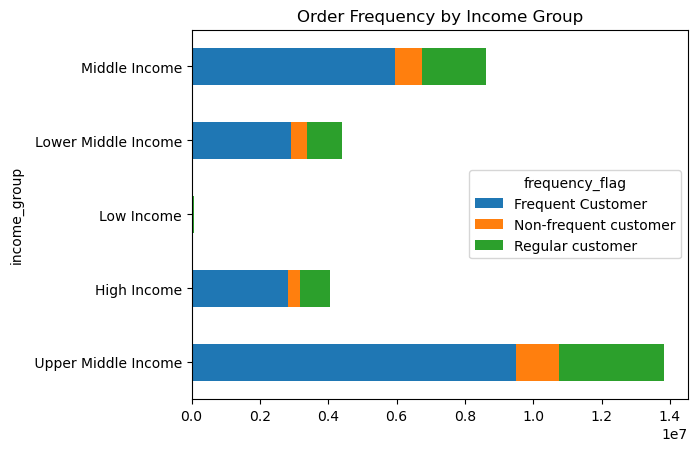

In [126]:
# create bar chart
income_order_bar = income_order.plot.barh(stacked = True)
plt.title('Order Frequency by Income Group')

In [127]:
# export visualization
income_order_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_order.png'))

In [92]:
# crosstab income with spending habits
income_spending = pd.crosstab(ords_prods_dept['spending_flag'], ords_prods_dept['income_group'], dropna = False)

In [93]:
income_spending

income_group,Upper Middle Income,High Income,Low Income,Lower Middle Income,Middle Income
spending_flag,,,,,
High spender,165238,391504,0,5121,41562
Low spender,13665944,3663732,62185,4385082,8582847


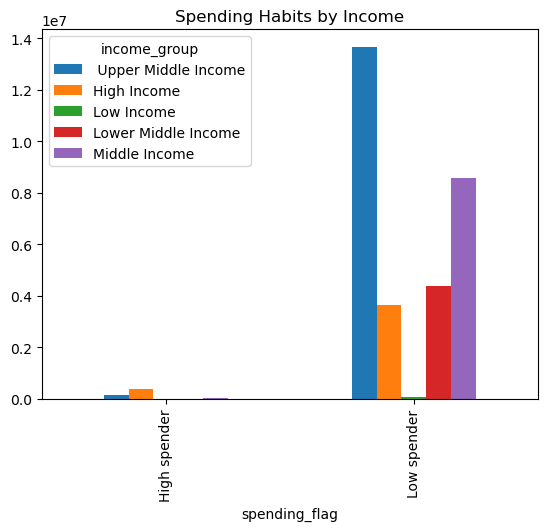

In [94]:
# create bar chart
income_spending_bar = income_spending.plot.bar(title = 'Spending Habits by Income')

In [95]:
# export visualization
income_spending_bar.figure.savefig(os.path.join(path, '04 Analysis', 'income_spending.png'))

In [97]:
# crosstab age group with income group
age_income = pd.crosstab(ords_prods_dept['age_group'], ords_prods_dept['income_group'], dropna = False)

In [98]:
age_income

income_group,Upper Middle Income,High Income,Low Income,Lower Middle Income,Middle Income
age_group,,,,,
Adult,2654984,570002,40609,1827882,4608057
Elder Adult,4688394,1515560,0,753983,772827
Middle Aged Adult,5817718,1932115,0,950086,966480
Young Adult,588852,32513,17444,758239,2018146


Text(0.5, 1.0, 'Income Groups by Age')

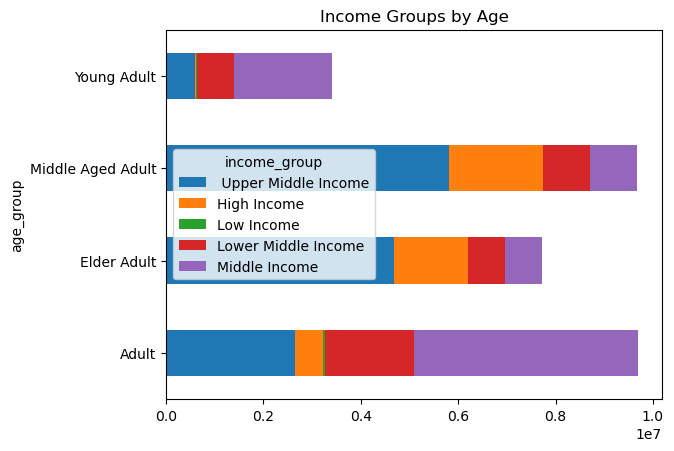

In [130]:
age_income_bar = age_income.plot.barh(stacked = True)
plt.title('Income Groups by Age')

In [131]:
# export visualization
age_income_bar.figure.savefig(os.path.join(path, '04 Analysis', 'age_income.png'))

In [112]:
# crosstab income with departments
income_dept = pd.crosstab(ords_prods_dept['department'], ords_prods_dept['income_group'], dropna = False)

In [113]:
income_dept

income_group,Upper Middle Income,High Income,Low Income,Lower Middle Income,Middle Income
department,,,,,
alcohol,60588,24716,337,21862,37124
babies,192745,55679,690,42748,118530
bakery,509039,153952,2048,142038,313689
beverages,1088423,325432,7267,472475,678234
breakfast,286611,86616,1699,114841,181043
bulk,14300,3815,55,5919,9362
canned goods,471539,138022,1453,111492,289521
dairy eggs,2350274,686516,9352,671464,1459313
deli,451174,130840,2029,139729,280030


Text(0.5, 1.0, 'Department Spending by Income')

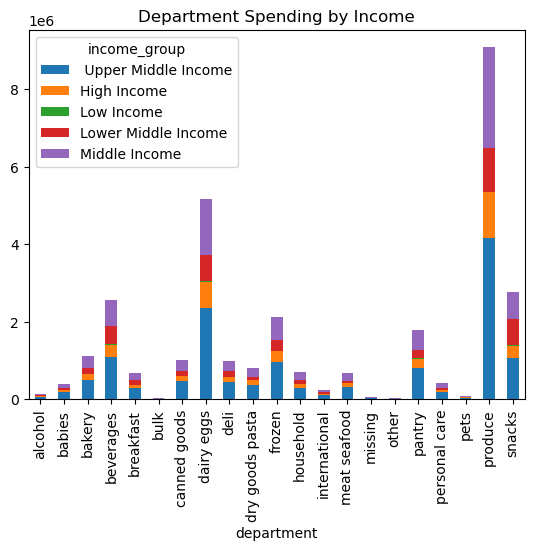

In [132]:
# creat bar chart
income_dept_bar = income_dept.plot.bar(stacked = True)
plt.title('Department Spending by Income')

In [133]:
# export visualization
income_dept_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_dept.png'))

# Customer profile based on department spending

## Snacks

In [136]:
# Create a flag to profile Snack buyers vs non-buyers
ords_prods_dept.loc[ords_prods_dept['department_id'] == 19, 'customer_snacks'] = 'snack_buyer'

In [137]:
ords_prods_dept.loc[ords_prods_dept['department_id'] != 19, 'customer_snacks'] = 'snack_non_buyer'

In [139]:
# Use user_id to identify snack buyers
updated_snack_columns = ords_prods_dept.loc[ords_prods_dept['customer_snacks'] == 'snack_buyer', 'user_id'].unique()

In [140]:
# Update the "customer" column
ords_prods_dept.loc[ords_prods_dept['user_id'].isin(updated_snack_columns), 'customer_snacks'] = 'snack_buyer

In [141]:
# Check distribution
ords_prods_dept['customer_snacks'].value_counts()

snack_buyer        29852553
snack_non_buyer     1112011
Name: customer_snacks, dtype: int64

In [142]:
# crosstab snack buyer by age group
age_snacks = pd.crosstab(ords_prods_dept['age_group'], ords_prods_dept['customer_snacks'], dropna = False)

In [145]:
age_snacks = age_snacks.sort_values(by = ['snack_buyer'], ascending = True)

In [146]:
age_snacks

customer_snacks,snack_buyer,snack_non_buyer
age_group,,
Young Adult,3293522,121672
Elder Adult,7452633,278201
Middle Aged Adult,9315844,350829
Adult,9357009,345530


Text(0.5, 1.0, 'Snack Buying by Age Group')

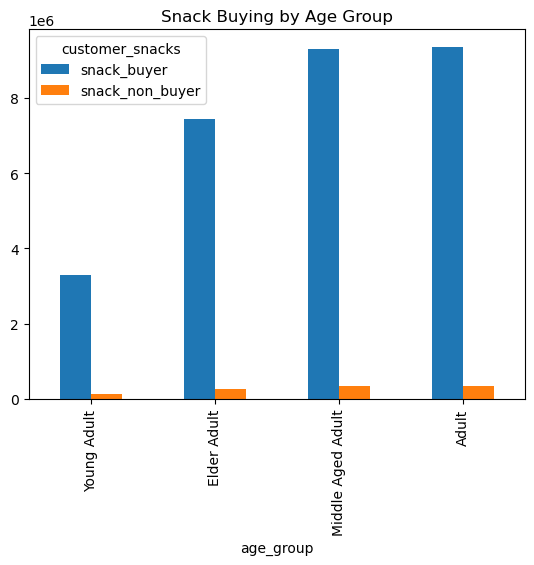

In [147]:
# create bar chart
age_snacks_bar = age_snacks.plot.bar()
plt.title('Snack Buying by Age Group')

In [148]:
# export visualization
age_snacks_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_snacks.png'))

In [149]:
# crosstab snack buyer by order frequency
order_snacks = pd.crosstab(ords_prods_dept['frequency_flag'], ords_prods_dept['customer_snacks'], dropna = False)

In [150]:
order_snacks

customer_snacks,snack_buyer,snack_non_buyer
frequency_flag,,
Frequent Customer,20668038,536438
Non-frequent customer,2648244,246731
Regular customer,6536271,328842


Text(0.5, 1.0, 'Snack Buying by Order Frequency')

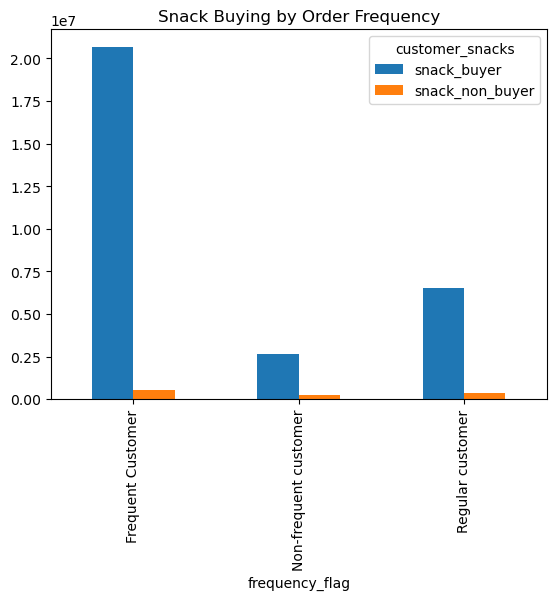

In [151]:
# create bar chart
order_snacks_bar = order_snacks.plot.bar()
plt.title('Snack Buying by Order Frequency')

In [152]:
# export visualization
order_snacks_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'order_snacks.png'))

In [153]:
# crosstab snack buyer by region
region_snacks = pd.crosstab(ords_prods_dept['region'], ords_prods_dept['customer_snacks'], dropna = False)

In [154]:
region_snacks

customer_snacks,snack_buyer,snack_non_buyer
region,,
Midwest,6410027,247964
Northeast,4683487,174755
South,9374569,347264
West,9384470,342028


In [155]:
region_snacks = region_snacks.sort_values(by = ['snack_buyer'], ascending = True)

Text(0.5, 1.0, 'Snack Buying by Region')

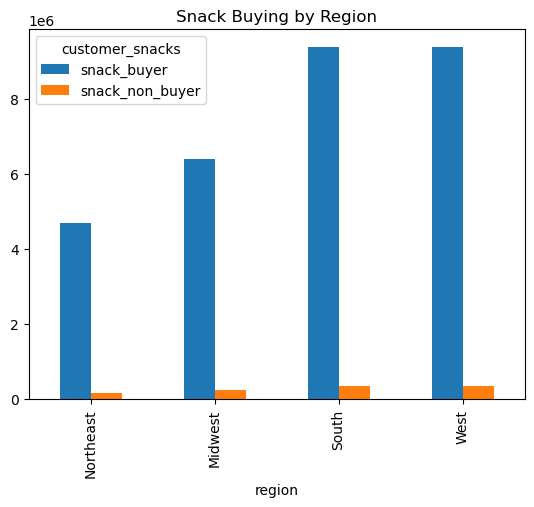

In [156]:
# create bar chart
region_snacks_bar = region_snacks.plot.bar()
plt.title('Snack Buying by Region')

In [157]:
# export visualization
region_snacks_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_snacks.png'))

In [158]:
# crosstab snack buyer by spending habits
spending_snacks = pd.crosstab(ords_prods_dept['spending_flag'], ords_prods_dept['customer_snacks'], dropna = False)

In [159]:
spending_snacks

customer_snacks,snack_buyer,snack_non_buyer
spending_flag,,
High spender,560490,42935
Low spender,29292063,1069076


Text(0.5, 1.0, 'Snack Buying by Spending Habits')

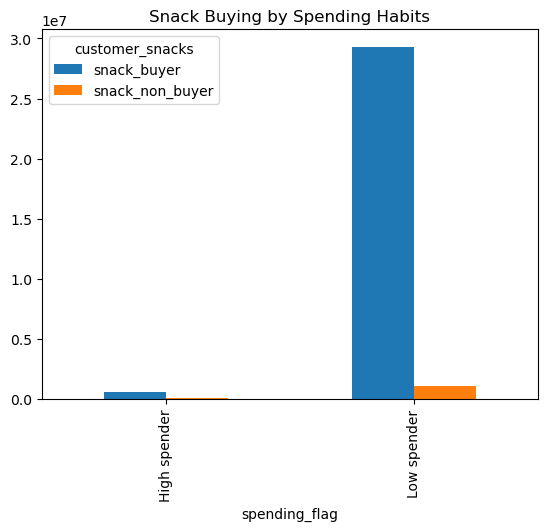

In [160]:
# create bar chart
spending_snacks_bar = spending_snacks.plot.bar()
plt.title('Snack Buying by Spending Habits')

In [161]:
# export visualization
spending_snacks_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'spending_snacks.png'))

## Beverages

In [162]:
# Create a flag to profile Beverage buyers vs non-buyers
ords_prods_dept.loc[ords_prods_dept['department_id'] == 7, 'customer_beverages'] = 'beverage_buyer'

In [163]:
ords_prods_dept.loc[ords_prods_dept['department_id'] != 7, 'customer_beverages'] = 'beverage_non_buyer'

In [164]:
# Use user_id to identify beverage buyers
updated_beverage_columns = ords_prods_dept.loc[ords_prods_dept['customer_beverages'] == 'beverage_buyer', 'user_id'].unique()

In [166]:
# Update the "customer" column
ords_prods_dept.loc[ords_prods_dept['user_id'].isin(updated_beverage_columns), 'customer_beverages'] = 'beverage_buyer'

In [167]:
# Check distribution
ords_prods_dept['customer_beverages'].value_counts()

beverage_buyer        29331104
beverage_non_buyer     1633460
Name: customer_beverages, dtype: int64

In [168]:
# crosstab beverage buyer by age group
age_beverage = pd.crosstab(ords_prods_dept['age_group'], ords_prods_dept['customer_beverages'], dropna = False)

In [169]:
age_beverage

customer_beverages,beverage_buyer,beverage_non_buyer
age_group,,
Adult,9191182,511357
Elder Adult,7316490,414344
Middle Aged Adult,9170816,495857
Young Adult,3232659,182535


In [171]:
age_beverage = age_beverage.sort_values(by = ['beverage_buyer'], ascending = True)

Text(0.5, 1.0, 'Beverage Buying by Age Group')

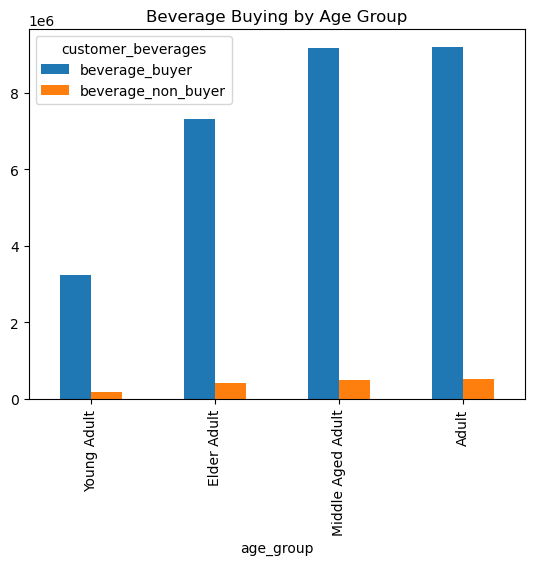

In [172]:
# create bar chart
age_beverage_bar = age_beverage.plot.bar()
plt.title('Beverage Buying by Age Group')

In [173]:
# export visualization
age_beverage_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_beverage.png'))

In [174]:
# crosstab beverage buyer by order frequency
order_beverage = pd.crosstab(ords_prods_dept['frequency_flag'], ords_prods_dept['customer_beverages'], dropna = False)

In [175]:
order_beverage

customer_beverages,beverage_buyer,beverage_non_buyer
frequency_flag,,
Frequent Customer,20370442,834034
Non-frequent customer,2576416,318559
Regular customer,6384246,480867


Text(0.5, 1.0, 'Beverage Buying by Order Frequency')

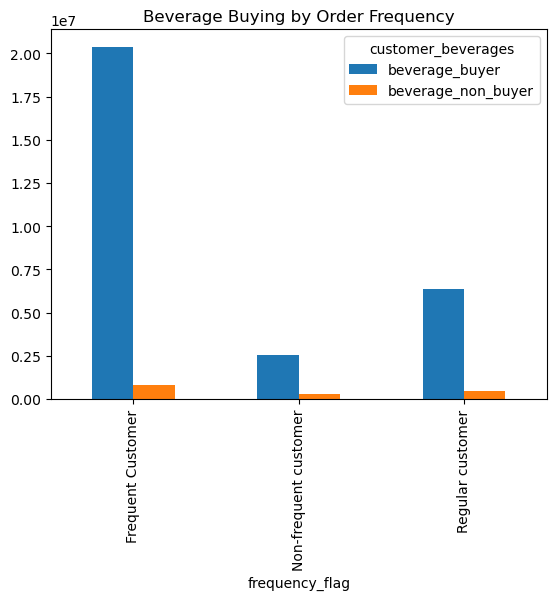

In [176]:
# create bar chart
order_beverage_bar = order_beverage.plot.bar()
plt.title('Beverage Buying by Order Frequency')

In [177]:
# export visualization
order_beverage_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'order_beverage.png'))

In [186]:
# crosstab beverage buyer by region
region_beverage = pd.crosstab(ords_prods_dept['region'], ords_prods_dept['customer_beverages'], dropna = False)

In [187]:
region_beverage

customer_beverages,beverage_buyer,beverage_non_buyer
region,,
Midwest,6309141,348850
Northeast,4599592,258650
South,9218226,503607
West,9204145,522353


In [188]:
region_beverage = region_beverage.sort_values(by = ['beverage_buyer'], ascending = True)

Text(0.5, 1.0, 'Beverage Buying by Region')

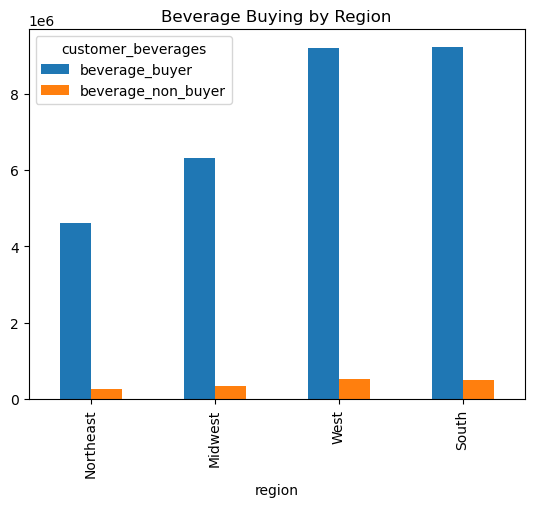

In [189]:
# create bar chart
region_beverage_bar = region_beverage.plot.bar()
plt.title('Beverage Buying by Region')

In [190]:
# export visualization
region_beverage_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_beverage.png'))

In [191]:
# crosstab beverage buyer by spending habits
spending_beverage = pd.crosstab(ords_prods_dept['spending_flag'], ords_prods_dept['customer_beverages'], dropna = False)

In [192]:
spending_beverage

customer_beverages,beverage_buyer,beverage_non_buyer
spending_flag,,
High spender,571206,32219
Low spender,28759898,1601241


Text(0.5, 1.0, 'Beverage Buying by Spending Habits')

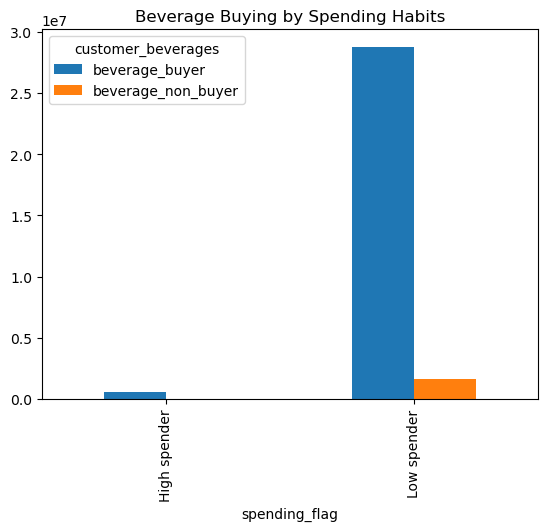

In [193]:
# create bar chart
spending_beverage_bar = spending_beverage.plot.bar()
plt.title('Beverage Buying by Spending Habits')

In [194]:
# export visualization
spending_beverage_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'spending_beverage.png'))

# Customer profile based on number of familial status/ number of dependents

In [195]:
# Check the different categories in the Family Status column
ords_prods_dept['marital_status'].value_counts()

married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: marital_status, dtype: int64

In [197]:
# Create a Family Status flag for 'single with no dependents'
ords_prods_dept.loc[(ords_prods_dept['marital_status'].isin(['divorced/widowed', 'living with parents and siblings', 'single'])) & (ords_prods_dept['number_od_dependants']==0), 'family_status_flag'] = 'Single with NO Dependants'

In [198]:
# create a family status flag for 'single with dependants'
ords_prods_dept.loc[(ords_prods_dept['marital_status'].isin(['divorced/widowed', 'living with parents and siblings', 'single'])) & (ords_prods_dept['number_od_dependants'] >=1), 'family_status_flag'] = 'Single WITH Dependants'

In [199]:
# create a family status flag for 'married with no dependants'
ords_prods_dept.loc[(ords_prods_dept['marital_status'] == 'married') & (ords_prods_dept['number_od_dependants'] == 1), 'family_status_flag'] = 'Married with NO Dependants'

In [200]:
# create a family status flag for 'married with dependants'
ords_prods_dept.loc[(ords_prods_dept['marital_status'] == 'married') & (ords_prods_dept['number_od_dependants'] > 1), 'family_status_flag'] = 'Married WITH Dependants'

In [201]:
# check results
ords_prods_dept['family_status_flag'].value_counts()

Married WITH Dependants       14532650
Single with NO Dependants      7739681
Married with NO Dependants     7211061
Single WITH Dependants         1481172
Name: family_status_flag, dtype: int64

Text(0.5, 1.0, 'Famiy Status')

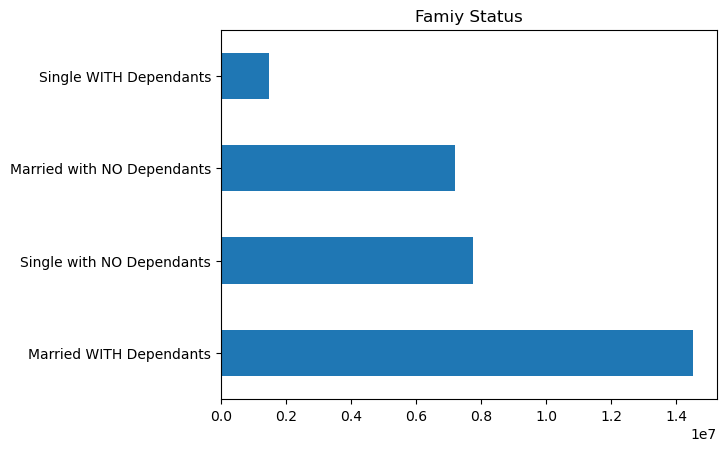

In [203]:
# create bar chart
family_status_bar = ords_prods_dept['family_status_flag'].value_counts().plot.barh()
plt.title('Famiy Status')

In [204]:
# export visualization
family_status_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_status.png'))

In [209]:
# crosstab family staturs by age group
age_family = pd.crosstab(ords_prods_dept['family_status_flag'], ords_prods_dept['age_group'], dropna = False)

In [210]:
age_family

age_group,Adult,Elder Adult,Middle Aged Adult,Young Adult
family_status_flag,,,,
Married WITH Dependants,4850937,3908474,4819858,734472
Married with NO Dependants,2419202,1916639,2398482,374040
Single WITH Dependants,0,0,0,1481172
Single with NO Dependants,2432400,1905721,2448333,825510


In [211]:
age_family = age_family.sort_values(by = ['Young Adult'], ascending = True)

In [212]:
age_family

age_group,Adult,Elder Adult,Middle Aged Adult,Young Adult
family_status_flag,,,,
Married with NO Dependants,2419202,1916639,2398482,374040
Married WITH Dependants,4850937,3908474,4819858,734472
Single with NO Dependants,2432400,1905721,2448333,825510
Single WITH Dependants,0,0,0,1481172


Text(0.5, 1.0, 'Familial Status by Age Group')

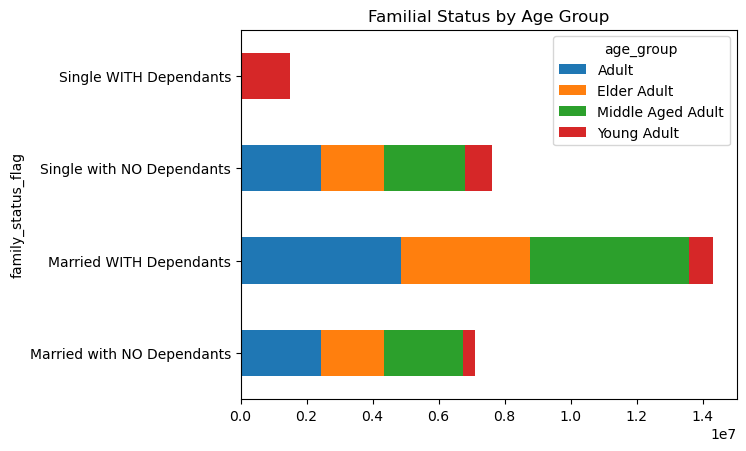

In [215]:
# create bar chart
age_family_bar = age_family.plot.barh(stacked = True)
plt.title('Familial Status by Age Group')

In [216]:
# export visualization
age_family_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_family.png'))

In [217]:
# crosstab family staturs by order frequency
order_family = pd.crosstab(ords_prods_dept['family_status_flag'], ords_prods_dept['frequency_flag'], dropna = False)

In [218]:
order_family

frequency_flag,Frequent Customer,Non-frequent customer,Regular customer
family_status_flag,,,
Married WITH Dependants,9942325,1349451,3240874
Married with NO Dependants,4946500,690372,1574189
Single WITH Dependants,1030514,138646,312012
Single with NO Dependants,5285137,716506,1738038


In [220]:
order_family = order_family.sort_values(by = ['Frequent Customer'], ascending = True)

Text(0.5, 1.0, 'Familial Status by Order Frequency')

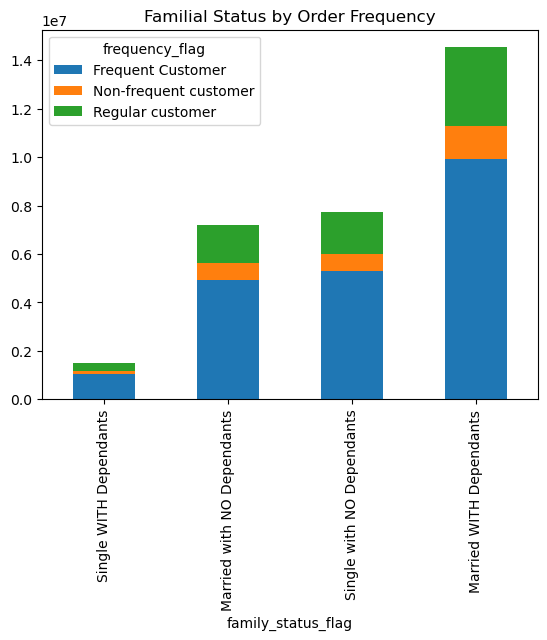

In [222]:
# create bar chart
order_family_bar = order_family.plot.bar(stacked = True)
plt.title('Familial Status by Order Frequency')

In [223]:
# export visualization
order_family_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'order_family.png'))

In [229]:
# crosstab family staturs by region
region_family = pd.crosstab(ords_prods_dept['region'], ords_prods_dept['family_status_flag'], dropna = False)

In [230]:
region_family

family_status_flag,Married WITH Dependants,Married with NO Dependants,Single WITH Dependants,Single with NO Dependants
region,,,,
Midwest,3094433,1567764,321541,1674253
Northeast,2284035,1144021,226961,1203225
South,4562154,2243160,475975,2440544
West,4592028,2256116,456695,2421659


In [231]:
region_family = region_family.sort_values(by = ['Single WITH Dependants'], ascending = True)

Text(0.5, 1.0, 'Familial Status by Region')

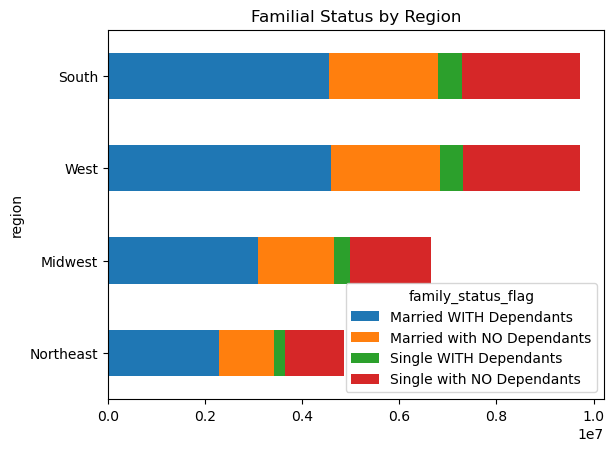

In [232]:
# create bar chart
region_family_bar = region_family.plot.barh(stacked = True)
plt.title('Familial Status by Region')

In [233]:
# export visualization
region_family_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_family.png'))

In [234]:
# crosstab family staturs by spending habits
spending_family = pd.crosstab(ords_prods_dept['family_status_flag'], ords_prods_dept['spending_flag'], dropna = False)

In [235]:
spending_family

spending_flag,High spender,Low spender
family_status_flag,,
Married WITH Dependants,295505,14237145
Married with NO Dependants,133952,7077109
Single WITH Dependants,27926,1453246
Single with NO Dependants,146042,7593639


Text(0.5, 1.0, 'Familial Status by Spending Habits')

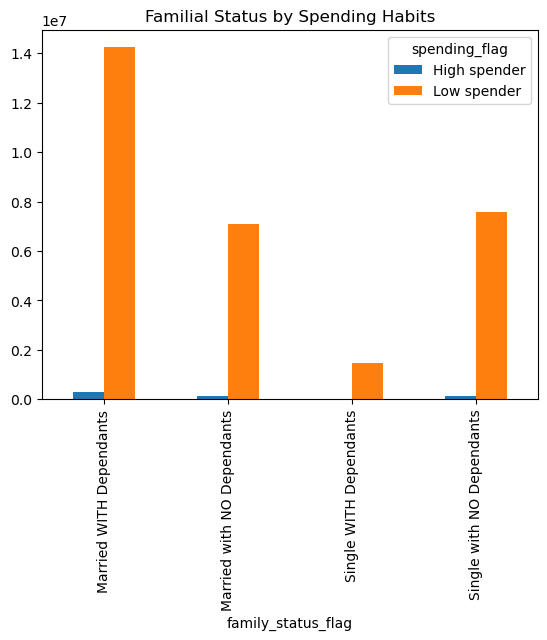

In [237]:
# create bar chart
spending_family_bar = spending_family.plot.bar()
plt.title('Familial Status by Spending Habits')

In [238]:
# export visualization
spending_family_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'spending_family.png'))

In [241]:
# crosstab family staturs by department
department_family = pd.crosstab(ords_prods_dept['department'], ords_prods_dept['family_status_flag'], dropna = False)

In [242]:
department_family

family_status_flag,Married WITH Dependants,Married with NO Dependants,Single WITH Dependants,Single with NO Dependants
department,,,,
alcohol,66171,33250,8379,36827
babies,194848,92835,19381,103328
bakery,523567,262182,53684,281395
beverages,1209634,597819,119107,645341
breakfast,313272,157948,33198,166432
bulk,15724,8094,1633,8000
canned goods,476452,236125,48477,251020
dairy eggs,2421459,1211140,250207,1294376
deli,470594,231739,48119,253382


Text(0.5, 1.0, 'Familial Status by Department')

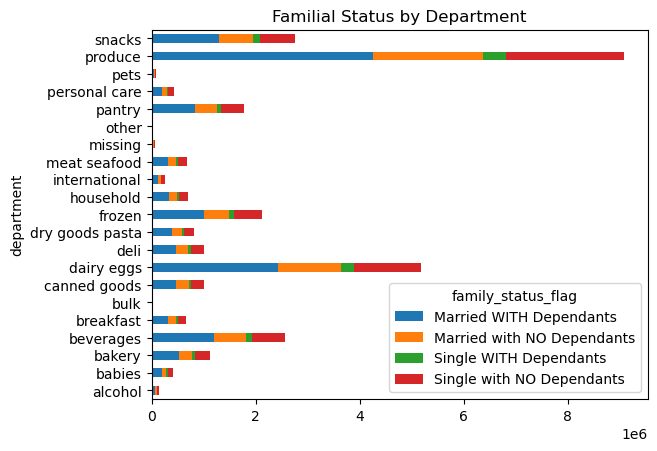

In [244]:
# create bar chart
department_family_bar = department_family.plot.barh(stacked = True)
plt.title('Familial Status by Department')

In [245]:
# export visualization
department_family_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'department_family.png'))

# Export

In [246]:
ords_prods_dept.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_dataset.pkl'))